In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
data = pd.read_excel("/content/ecom customer_data(1).xlsx")
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
df = data.copy()
df.info() # provides us a summarized info of the data about the cloumns and their datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
# Checking For Duplicates  only rows usefull for handling duplicate data If any duplicate value is present
df[df.duplicated()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


In [ ]:
# Checking Null Values
df.isna().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [ ]:
# Filling NaN values with mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
# the first sum is to print all the null values with their column name and second sum is for only getting one integer value
df.isna().sum().sum()

0

Data Visualisations

In [ ]:
# to count values of the gender values
df.Gender.value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

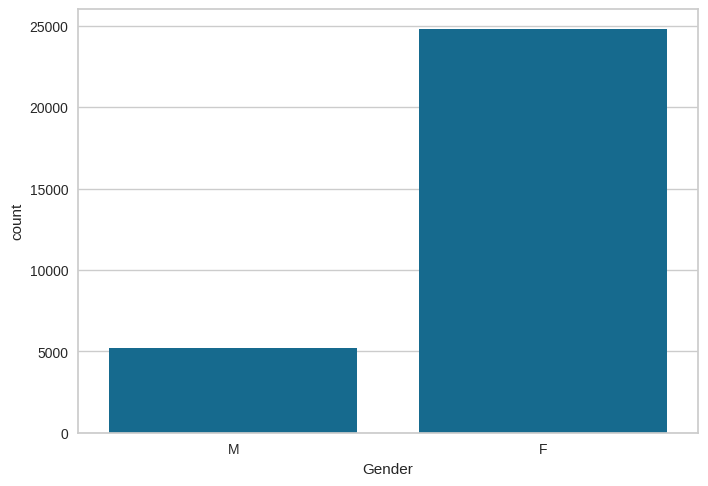

In [ ]:
#plot to check the count of male and female customer
#plot a count plot just like bar chart
sns.countplot(data=df,x='Gender')
plt.show()

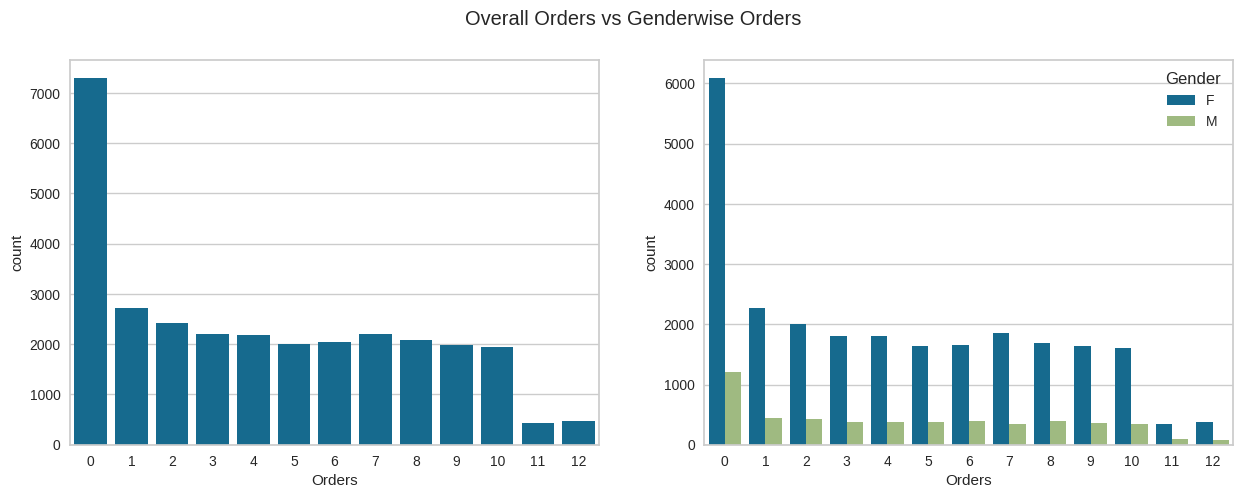

In [ ]:
#overall Order count
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df,x='Orders')

#order count by each gender
plt.subplot(1,2,2)
sns.countplot(data=df,x='Orders',hue='Gender')
plt.suptitle("Overall Orders vs Genderwise Orders")
plt.show()

In [ ]:
#create a boxplot for orders and searches for a specific brand
cols=list(df.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(30,30)) #size
  for i,col in enumerate(lst,1): # It Iterate from list and starts from value 1
    plt.subplot(6,6,i) # 6,6 is 6 plots in the row and 6 in the column at position i
    sns.boxplot(data=df,x=df[col])
dist_list(cols)

Corelation Grap(Heat Map)

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr())
plt.show()

In [ ]:
df.iloc[:,2:].hist(figsize=(40,30))
plt.show()

In [ ]:
new_df=df.copy()
new_df['Total Search']=new_df.iloc[:,3:].sum(axis=1) # calculates the sum row wise (column = 0)
new_df.head()

In [ ]:
new_df.sort_values('Total Search',ascending=False)

In [ ]:
plt.figure(figsize=(13,8))
plt_data=new_df.sort_values('Total Search',ascending=False)[['Cust_ID','Gender','Total Search']].head(10)
sns.barplot(data=plt_data,
            x='Cust_ID',
            y='Total Search',
            hue='Gender',
            order=plt_data.sort_values('Total Search',ascending =False).Cust_ID)
plt.title('Top 10 Cust_ID based on Total Searches')
plt.show()

Scaling<br>
It reformats the array with our choice

In [ ]:
x= df.iloc[:,2:].values
x

In [ ]:
scale=MinMaxScaler()
features= scale.fit_transform(x)
features

In [ ]:
inertia = []
for i in range(1,16):
  k_means = KMeans(n_clusters=i)
  k_means = k_means.fit(features)
  inertia.append(k_means.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Elbow Graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16),inertia, 'bo-')
plt.xlabel('No. of cluster'),plt.ylabel('Inertia')

#Kelbow Visualizer
plt.subplot(1,2,2)
kmeans= KMeans()
visualize = KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(features)
plt.suptitle('Elbow Graph and Elbow Visualizer')
visualize.poof()
plt.show()


In [ ]:
silhouette_avg = []
for i in range(2,16):
  # intialise kmeans
  kmeans = KMeans(n_clusters=i)
  cluster_labels = kmeans.fit_predict(features)
  #silhoutte score
  silhouette_avg.append(silhouette_score(features,cluster_labels))

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg,'bX-') # 'b' indicates the  blue colour and 'x' indicates the x mark on the points
plt.xlabel('Values of k')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte analysis for optimal k')
plt.show()

K-Means Model<br>
Taking K value as 3 as per Elbow Method

In [ ]:
model = KMeans(n_clusters=3)
model = model.fit(features)

In [ ]:
y_km = model.predict(features)
centers = model.cluster_centers_

In [ ]:
df['Cluster'] = pd.DataFrame(y_km)
df.to_csv('Cluster_data',index=False)

In [ ]:
df['Cluster'].value_counts() # It is a method that counts the number of occurrences of each unique value in the cluster

In [ ]:
sns.countplot(data=df,x='Cluster')
plt.show()

Analyzing Clusters

In [ ]:
c_df = pd.read_csv('Cluster_data')
c_df.head()

In [ ]:
c_df['Total Search'] = c_df.iloc[:,3:38].sum(axis=1)

Analyzing Cluster 0

In [ ]:
cl_0 = c_df.groupby(['Cluster','Gender'],  as_index= False).sum().query('Cluster == 0')
cl_0

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 0'), x='Gender')
plt.title('Customers Count')

plt.subplot(1,2,2)
sns.barplot(data=cl_0,x='Gender',y="Total Search")
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Searches in "Cluster 0"')
plt.show()

Analyzing Cluster 1

In [ ]:
cl_1 = c_df.groupby(['Cluster','Gender'],  as_index= False).sum().query('Cluster == 1')
cl_1

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 1'), x='Gender')
plt.title('Customers Count')

plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y="Total Search")
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Searches in "Cluster 1"')
plt.show()

Analyzing Cluster 2

In [ ]:
cl_2 = c_df.groupby(['Cluster','Gender'],  as_index= False).sum().query('Cluster == 2')
cl_2

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster == 2'), x='Gender')
plt.title('Customers Count')

plt.subplot(1,2,2)
sns.barplot(data=cl_2,x='Gender',y="Total Search")
plt.title('Total Searches by Gender')
plt.suptitle('No. of Customers and their Searches in "Cluster 2"')
plt.show()

Overall Analysis

In [ ]:
final_df = c_df.groupby(['Cluster'], as_index= False).sum()
final_df

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=c_df,x='Cluster',hue='Gender')
plt.title('Total Customers on each Cluster')
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='Cluster',y='Total Search')
plt.title('Total Searches by each group')

plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Orders')
plt.title('Past Orders by each group')
plt.suptitle('No. of times customers serached the products and their past orders')
plt.show()